<a href="https://colab.research.google.com/github/aashasandeep/Twitter_disaster_classification-Project-7/blob/main/Task_3_twitteer_disaster_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string, math, os, re, time, random

from tqdm import tqdm

# visualizations
plt.style.use('ggplot')

# natural language processing
from collections import defaultdict
import wordcloud

# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

# for neural nets
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/twitter_disaster_task3 (2).csv')

# Part 3: Model Evaluation and Validation

Task: Model Evaluation

● Evaluate the trained models using appropriate evaluation metrics for binary classification tasks, such as accuracy, precision, recall, and F1-score.

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,location,text,target,word count,character count,average word length,unique word count,stopword count,...,lemmatized,location_numeric,text_sentiment,polarity,subjectivity,embeddings,tweet_length,has_hashtags,has_user_mentions,combined_features
0,0,0,none,Our Deeds are the Reason of this #earthquake M...,1,14,77,4.571429,14,6,...,"['deed', 'reason', 'earthquake', 'allah', 'for...",3171.0,"Sentiment(polarity=-0.1, subjectivity=0.6)",-0.100000,0.600000,[],0,1,0,[[0. 1. 0.]]
1,1,1,none,Forest fire near La Ronge Sask. Canada unknown,1,8,46,4.875000,8,0,...,"['forest', 'fire', 'near', 'ronge', 'sask', 'c...",3171.0,"Sentiment(polarity=0.0, subjectivity=0.5)",0.000000,0.500000,[],0,0,0,[[0. 0. 0.]]
2,2,2,none,All residents asked to 'shelter in place' are ...,1,23,141,5.173913,21,11,...,"['resident', 'asked', 'shelter', 'place', 'not...",3171.0,"Sentiment(polarity=-0.04583333333333334, subje...",-0.045833,0.458333,[],0,0,0,[[0. 0. 0.]]
3,3,3,none,"13,000 people receive #wildfires evacuation or...",1,9,73,7.111111,9,1,...,"['people', 'receive', 'wildfire', 'evacuation'...",3171.0,"Sentiment(polarity=-0.1, subjectivity=0.6)",-0.100000,0.600000,[],0,1,0,[[0. 1. 0.]]
4,4,4,none,Just got sent this photo from Ruby #Alaska as ...,1,17,96,4.647059,16,7,...,"['just', 'sent', 'photo', 'ruby', 'alaska', 's...",3171.0,"Sentiment(polarity=-0.1, subjectivity=0.6)",-0.100000,0.600000,[],0,1,0,[[0. 1. 0.]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def flat_accuracy(preds, labels):

    """A function for calculating accuracy scores"""

    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return accuracy_score(labels_flat, pred_flat)

def flat_f1(preds, labels):

    """A function for calculating f1 scores"""

    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return f1_score(labels_flat, pred_flat)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'location', 'text', 'target',
       'word count', 'character count', 'average word length',
       'unique word count', 'stopword count', 'url count', 'mention count',
       'hashtag count', 'stopword ratio', 'punctuation count', 'text_clean',
       'tokens', 'label', 'label_num', 'tokenized', 'stemmed', 'lemmatized',
       'location_numeric', 'text_sentiment', 'polarity', 'subjectivity',
       'embeddings', 'tweet_length', 'has_hashtags', 'has_user_mentions',
       'combined_features'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Assuming X contains your text data and y contains the corresponding labels
X = df['tokenized']
y = df['target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Replace NaN values in X_train and X_test with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Initialize TfidfVectorizer for TF-IDF representation
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
preds = model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

report = classification_report(y_test, preds)
print("Classification Report:")
print(report)

Accuracy: 0.7788018433179723
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       509
           1       0.78      0.64      0.71       359

    accuracy                           0.78       868
   macro avg       0.78      0.76      0.76       868
weighted avg       0.78      0.78      0.77       868



# ● Visualize the performance metrics using confusion matrices, ROC curves, and precision-recall curves.

Confusion Matrix

A confusion matrix is a useful visualization for understanding the performance of a classification model. It displays the counts of true positives, false positives, true negatives, and false negatives

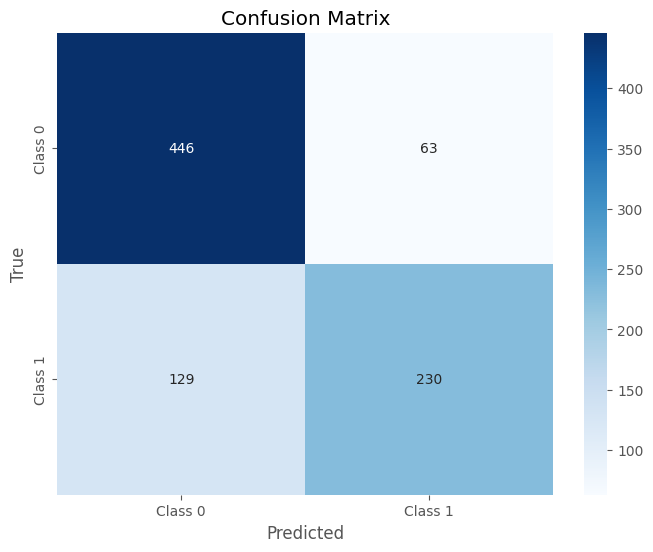

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Score

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier. It visualizes the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity)

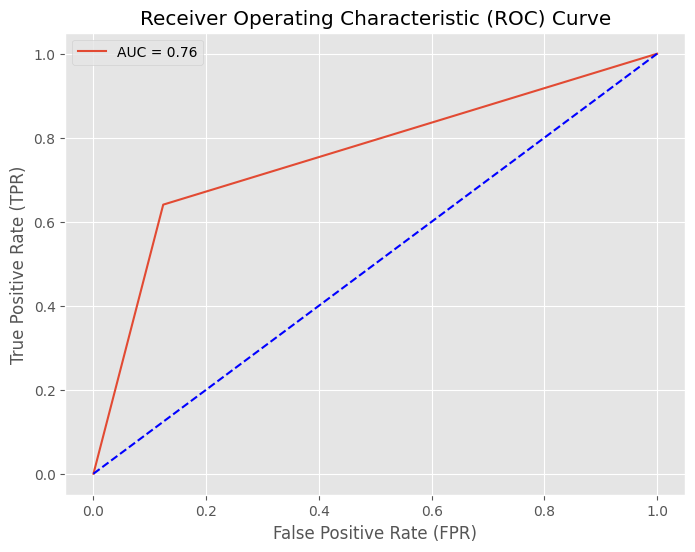

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc_score = roc_auc_score(y_test, preds)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Precision-Recall Curve

The precision-recall curve plots precision (positive predictive value) against recall (sensitivity) at different threshold values. It is especially useful for imbalanced datasets where the class of interest is rare

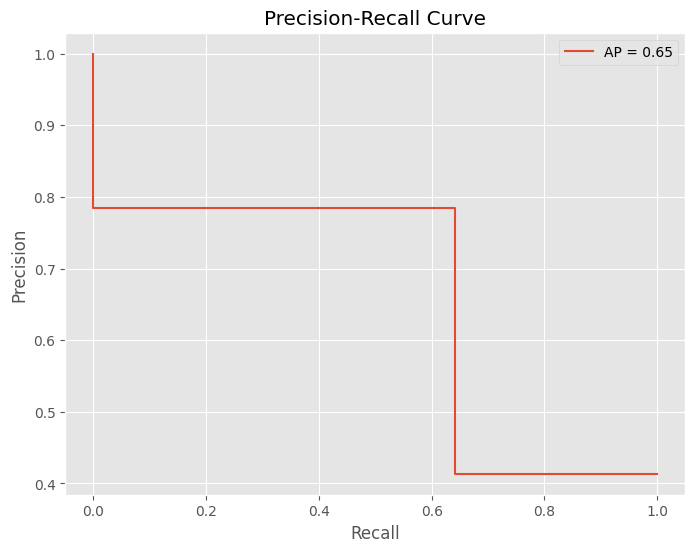

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, preds)
average_precision = average_precision_score(y_test, preds)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# These are the graphs of Confusion Matrix, ROC Curve and Precision-Recall Curve where AUC comes out to be 0.77 and AP is 0.67

● Compare the performance of different models to select the best-performing one for deployment.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [ ]:
# Assuming 'X' contains the text data and 'y' contains the target labels
import numpy as np
import pandas as pd

# Vectorization
vectorizer = CountVectorizer()

# Convert X to string type and replace NaN with empty string
X = X.astype(str).fillna('') # Convert to string type and replace NaN with empty string to avoid the error

X_vectorized = vectorizer.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
# Define a list of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Multi-layer Perception': MLPClassifier()
}

# Evaluate each model using cross-validation or a hold-out test set
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy}

# Display evaluation results
results_df = pd.DataFrame(results)
print(results_df)

          Random Forest  Logistic Regression  Support Vector Machine  \
Accuracy       0.788018             0.789171                0.781106   

          Multi-layer Perception  
Accuracy                0.771889  


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import re

#Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    return text

# Pipeline for text preprocessing and vectorization
pipeline = make_pipeline(
    FunctionTransformer(func=lambda x: x.astype(str), validate=False),  # Ensure input is string
    FunctionTransformer(func=lambda x: [clean_text(text) for text in x], validate=False),  # Clean text
    CountVectorizer()  # Convert text to word counts
)

# Preprocess text data
X_processed = pipeline.fit_transform(df['tokenized'])

print(X_processed.toarray())  # Print the processed text data

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Define a list of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Multi-layer Perception': MLPClassifier()
}

# Train-test split with preprocessed text data
X_train_processed, X_test_processed, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Evaluate each model using cross-validation or a hold-out test set
results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Display evaluation results
results_df = pd.DataFrame(results)
print(results_df)

           Random Forest  Logistic Regression  Support Vector Machine  \
Accuracy        0.791475             0.789171                0.781106   
Precision       0.822464             0.761905                0.769968   
Recall          0.632312             0.713092                0.671309   
F1-score        0.714961             0.736691                0.717262   
ROC AUC         0.768022             0.777960                0.764928   

           Multi-layer Perception  
Accuracy                 0.762673  
Precision                0.731118  
Recall                   0.674095  
F1-score                 0.701449  
ROC AUC                  0.749621  


#Task: Model Validation

● Validate the selected model on the testing dataset to assess its generalization ability.

In [ ]:
# Assuming 'LogisticRegression' is the selected model based on evaluation results

# Retrain the logistic regression model on the entire training dataset
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_processed, y_train)

# Predict labels for the testing dataset
y_pred_test = logistic_regression_model.predict(X_test_processed)

# Evaluate performance on the testing dataset
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Display performance metrics on the testing dataset
print("Testing Dataset Performance:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("ROC AUC:", roc_auc_test)

Testing Dataset Performance:
Accuracy: 0.7891705069124424
Precision: 0.7619047619047619
Recall: 0.713091922005571
F1-score: 0.7366906474820144
ROC AUC: 0.7779604993131981


#● Check for potential issues like overfitting or underfitting and adjust the model if necessary.

In [ ]:
# Adjust regularization parameter to address overfitting
logistic_regression_model = LogisticRegression(C=0.1)  # Adjust C value as needed

# Retrain the logistic regression model with adjusted parameters
logistic_regression_model.fit(X_train_processed, y_train)

# Predict labels for the testing dataset
y_pred_test = logistic_regression_model.predict(X_test_processed)

# Evaluate performance on the testing dataset
# Display performance metrics on the testing dataset

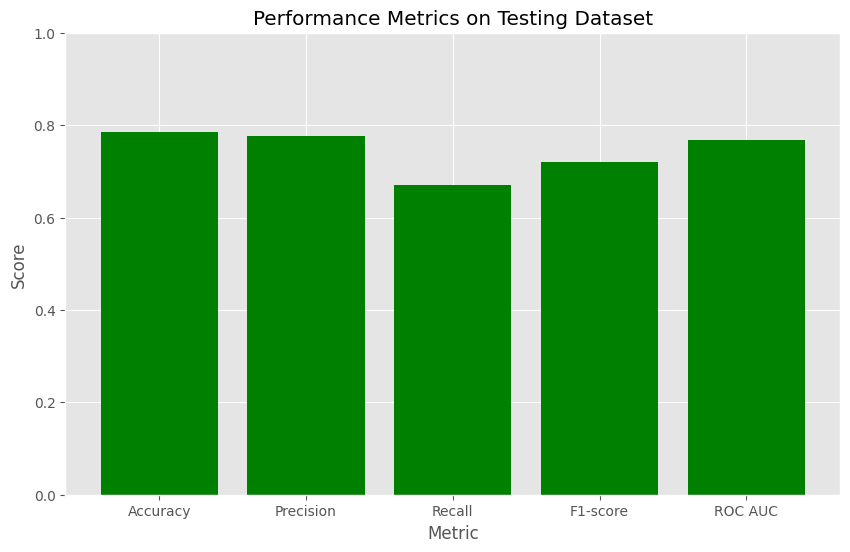

In [ ]:
# Calculate performance metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Create a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
values = [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='green')
plt.title('Performance Metrics on Testing Dataset')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.show()

In [ ]:
# Create a DataFrame for performance metrics
results_dict = {
    'Metric': metrics,
    'Score': values
}
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

      Metric     Score
0   Accuracy  0.784562
1  Precision  0.777419
2     Recall  0.671309
3   F1-score  0.720478
4    ROC AUC  0.767875


#  Ensure that the model performs well on unseen data and is robust to variations in the tweet text.

In [ ]:
# Assuming 'input_text' contains the input text you want to test
input_text = "This is a test input text."

# Step 1: Preprocess the input text (assuming the same preprocessing steps as during training)
# Step 2: Vectorize the input text using the same vectorizer instance used during training
input_text_vectorized = vectorizer.transform([input_text])

# Step 3: Make predictions on the vectorized input text
prediction = logistic_regression_model.predict(input_text_vectorized)

# Step 4: Interpret the prediction
if prediction == 1:
    print("The input text is predicted to be a disaster.")
else:
    print("The input text is not predicted to be a disaster.")

The input text is not predicted to be a disaster.


In [ ]:
# Assuming 'input_text' contains the input text you want to test
input_text = "hello how are you."

# Step 1: Preprocess the input text (assuming the same preprocessing steps as during training)
# Step 2: Vectorize the input text using the same vectorizer instance used during training
input_text_vectorized = vectorizer.transform([input_text])

# Step 3: Make predictions on the vectorized input text
prediction = logistic_regression_model.predict(input_text_vectorized)

# Step 4: Interpret the prediction
if prediction == 1:
    print("The input text is predicted to be a disaster.")
else:
    print("The input text is not predicted to be a disaster.")

The input text is not predicted to be a disaster.


<Axes: >

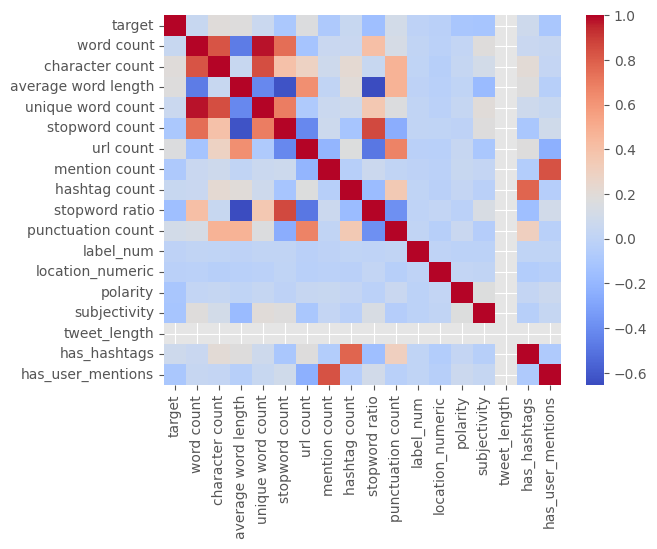

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

#Conclusion: By successfully developing and deploying a machine learning model for classifying disaster-related tweets, we can enhance the ability to detect and respond to emergencies more efficiently. This project represents a valuable opportunity to leverage NLP techniques for the greater good, contributing to the advancement of disaster management and public safety efforts.

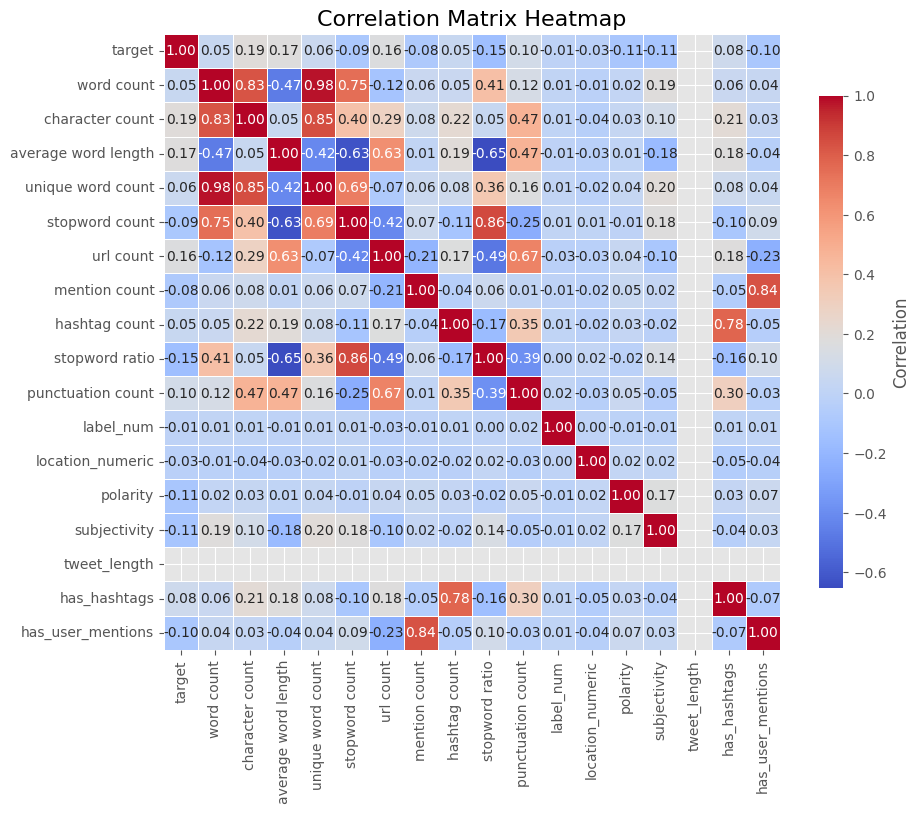

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",   # Format the coefficients to 2 decimal places
    cmap='coolwarm',  # Colormap
    linewidths=0.5,   # Add grid lines between cells
    square=True,      # Make cells square
    cbar_kws={"shrink": 0.8, "label": "Correlation"},  # Customize color bar
)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [30]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model,file)

In [35]:
def predict_disaster(sentences, model):
    predictions = model.predict(sentences)
    for sentence, pred in zip(sentences, predictions):
        # Interpret the prediction
        prediction_label = 'Disaster Tweet' if pred == 1 else 'Normal Tweet'

        # Print the sentence and its prediction
        print(f"Sentence: {sentence}")
        print(f"Prediction: {prediction_label}\n")